In [ ]:
#Conceitos Básicos!

O que é uma interpolação?

Método que permite construir um novo conjunto de dados a partir de um conjunto discreto de dados pontuais 

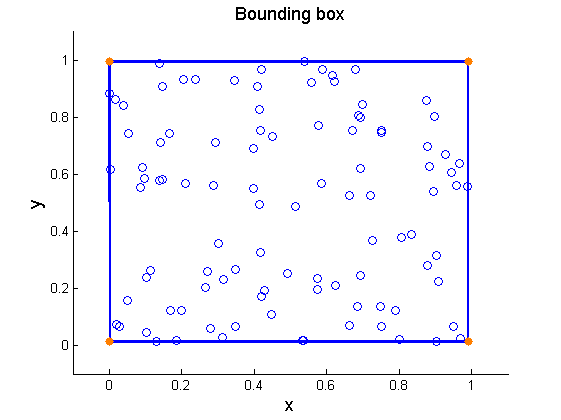


Mais afinal o que seria conjuntos discreto? Espaços Fisicos infinitos X finitos 

Finitos;
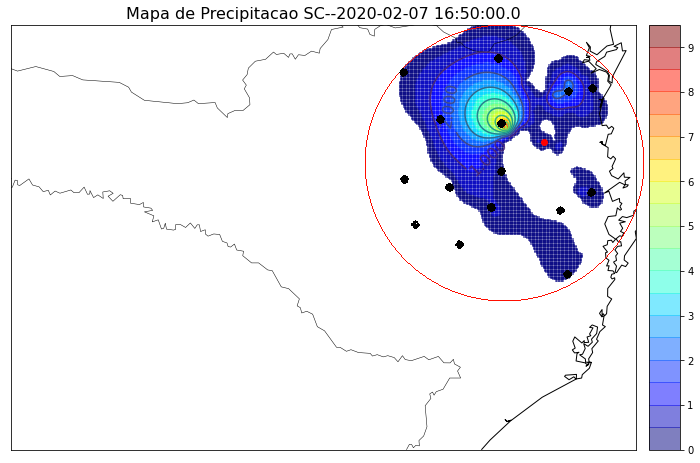

Infinitos:

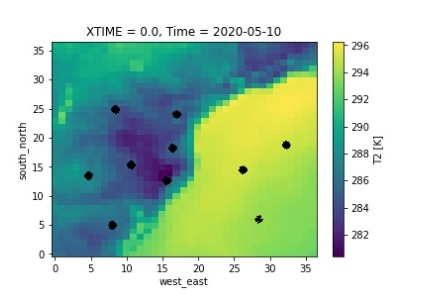

---



---



Download;
No capitulo “Exercícios Livro de Radar Meteorológico_2. Trabalhando com dados de radares duplos polarimétricos de Cemaden, formatos GeoTIFF e HDF5.’, foi introduzido o caminho para se realizar o download dos dados fornecidos pelo CEMADEN.
medium.com
Para termos acesso aos dados de pluviômetros acessaremos seu dado interativo e selecionaremos ‘Download’ de dados e depois ‘Dados Pluviométricos’
http://www2.cemaden.gov.br/categoria/redededados/

In [ ]:
#Importando as bibliotecas necessaŕias para realizar o script, quais bibliotecas necessárias?
# 1 - Pandas (Já vem junto ao colab)
# 2 - Cartopy
!pip install cartopy
# 3 - Matplotlib (Já vem junto ao colab)
# 4 - Metpy
!pip install metpy
# 5 - Drive (Já vem junto ao colab)

In [235]:
#Importando bibliotecas 
from metpy.interpolate import (interpolate_to_grid, remove_nan_observations,remove_repeat_coordinates)
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [265]:
#Alternativa para abrir dados do drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [270]:
!cp /content/gdrive/My\ Drive/aula_int/* ./

In [267]:
#Alternativa caso o dados não abram no drive - Uso do Github
!wget

In [271]:
#Preparando os dados 
colnames = ['Munic','code','uf','nome_est','lat','lon','data','preci','nan']
dado=pd.read_csv("data_fev.csv", sep=';', names=colnames) 
dado = dado.iloc[1: , :].reset_index(drop=True)
del dado['nan']
dado

,Munic,code,uf,nome_est,lat,lon,data,preci
0,ÁGUAS DE LINDÓIA,350050101A,SP,Jardim São Francisco,"-46,628","-22,475",2021-02-01 00:30:00.0,"0,00"
1,ÁGUAS DE LINDÓIA,350050101A,SP,Jardim São Francisco,"-46,628","-22,475",2021-02-01 01:30:00.0,"0,00"
2,ÁGUAS DE LINDÓIA,350050101A,SP,Jardim São Francisco,"-46,628","-22,475",2021-02-01 02:30:00.0,"0,00"
3,ÁGUAS DE LINDÓIA,350050101A,SP,Jardim São Francisco,"-46,628","-22,475",2021-02-01 03:30:00.0,"0,00"
4,ÁGUAS DE LINDÓIA,350050101A,SP,Jardim São Francisco,"-46,628","-22,475",2021-02-01 04:30:00.0,"0,20"
...,...,...,...,...,...,...,...,...
520885,VOTORANTIM,355700601A,SP,Centro,"-47,447","-23,545",2021-02-28 23:10:00.0,"0,20"
520886,VOTORANTIM,355700601A,SP,Centro,"-47,447","-23,545",2021-02-28 23:20:00.0,"0,20"
520887,VOTORANTIM,355700601A,SP,Centro,"-47,447","-23,545",2021-02-28 23:30:00.0,"0,20"
520888,VOTORANTIM,355700601A,SP,Centro,"-47,447","-23,545",2021-02-28 23:40:00.0,"0,20"


In [272]:
#usando função replace para mudar , para ponto
#Latitude
dado['lat'] = [x.replace(',', '.') for x in dado['lat']]
dado['lat']=dado['lat'].astype(float)
#Longitude
dado['lon'] = [x.replace(',', '.') for x in dado['lon']]
dado['lon']=dado['lon'].astype(float)
#Precipitação
dado['preci'] = [x.replace(',', '.') for x in dado['preci']]
dado['preci']=dado['preci'].astype(float)

In [247]:
#Selecionando dados e enviando para lista 
temp=dado.data.tolist()
lat=dado.lat.tolist()
lon=dado.lon.tolist()
pre=dado.preci.tolist()

In [254]:
data='2021-07-31 22:50:00.0'
la=[]
lo=[]
pr =[]
for i in range(0,len(temp)):
    if temp[i]==data:
        la.append(lat[i])
        lo.append(lon[i])
        pr.append(pre[i])

In [255]:
#Construindo grade para interpolação (Remova todos os x, y e z onde (x, y) é repetido e mantenha apenas a primeira ocorrência)
x, y, preci = remove_repeat_coordinates(lo,la,pr)

In [256]:
#Realizando a interpolação
gx, gy, img = interpolate_to_grid(x, y, preci, interp_type= 'rbf', #Parte do código responsavél pela interpolação
                                              minimum_neighbors=5, search_radius=20,
                                              hres=0.01)

In [180]:
#Baixando shapefile dos municipios
!wget https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/SP/sp_municipios.zip

--2021-08-19 20:40:41--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/SP/sp_municipios.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10027010 (9.6M) [application/zip]
Saving to: ‘sp_municipios.zip.1’

sp_municipios.zip.1 100%[===================>]   9.56M  4.45MB/s    in 2.1s    

2021-08-19 20:40:44 (4.45 MB/s) - ‘sp_municipios.zip.1’ saved [10027010/10027010]



In [150]:
#Descompactando dados
!unzip sp_municipios.zip

Archive:  sp_municipios.zip
 extracting: 35MUE250GC_SIR.cpg      
  inflating: 35MUE250GC_SIR.dbf      
  inflating: 35MUE250GC_SIR.prj      
  inflating: 35MUE250GC_SIR.shp      
  inflating: 35MUE250GC_SIR.shx      


In [251]:
#Abrindo dados 
dado_p = shpreader.Reader('35MUE250GC_SIR.prj')
mun = list(dado_p.geometries())

site para verificar projeções: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

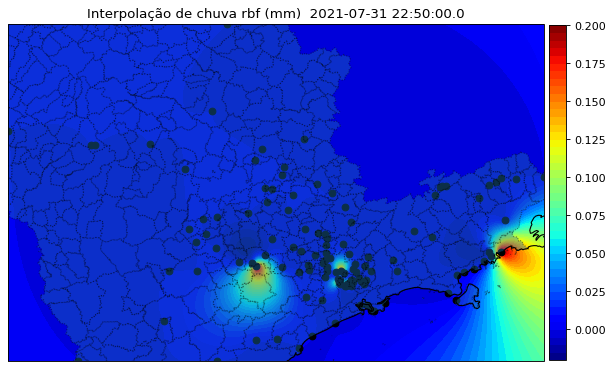

In [257]:
#Gerando figura dimensões
plt.figure(figsize=(9, 9), dpi= 80)

#Gerando projeção da figura 
ax = plt.axes(projection=ccrs.PlateCarree())
da=plt.contourf(gy, gx, img, 50, cmap = 'jet',
             transform=ccrs.PlateCarree())

#Adicionando shapefile 
mun_data = cfeature.ShapelyFeature(mun, ccrs.PlateCarree())
ax.add_feature(mun_data, edgecolor='black',alpha=0.4,linestyle=':')
ax.coastlines()

#Criando legendas
cb = plt.colorbar(da, orientation="vertical",fraction=0.030, pad=0.01)

plt.title('Interpolação de chuva rbf (mm)  ' + data)

#Plotando estações
plt.scatter(la,lo,color='black',label = 'pluviometros')

plt.show()

In [258]:
len(lo)

121

In [200]:
#Vamos fazer um acumulado? 

In [274]:
acc = pd.DataFrame(dado, columns=['lon', 'lat', 'preci']).groupby(['lon','lat'])['preci'].sum().reset_index()
preci = acc['preci']
lat = acc['lat']
lon = acc['lon']

In [275]:
acc

,lon,lat,preci
0,-25.001000,-47.933000,486.01
1,-24.777000,-48.200000,212.59
2,-24.758731,-48.068829,11.44
3,-24.757000,-48.505000,112.80
4,-24.737000,-47.532000,237.20
...,...,...,...
654,-21.113000,-47.795000,9.00
655,-20.844000,-49.386000,142.20
656,-20.818000,-49.411000,195.40
657,-20.795000,-49.410000,166.00


In [276]:
#encontrando o maior valor de preci
acc.loc[acc['preci'] == acc['preci'].max()]  

,lon,lat,preci
304,-23.53,-45.246,591.64


In [277]:
lat_t = acc.lat.tolist()
lon_t = acc.lon.tolist()
pre_t = acc.preci.tolist()

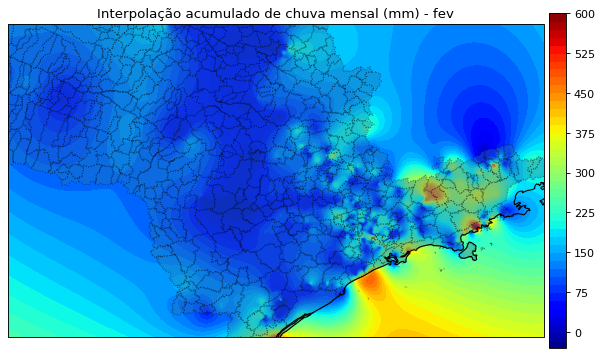

In [279]:
#Realizando procedimentos ensinados 
x, y, preci = remove_repeat_coordinates(lon_t,lat_t,pre_t)
#Realizando a interpolação
gx, gy, img = interpolate_to_grid(x, y, preci, interp_type= 'rbf', #Parte do código responsavél pela interpolação
                                              minimum_neighbors=5, search_radius=20,
                                              hres=0.01)
#Gerando figura dimensões
plt.figure(figsize=(9, 9), dpi= 80)

#Gerando projeção da figura 
ax = plt.axes(projection=ccrs.PlateCarree())
da=plt.contourf(gy, gx, img, 50, cmap = 'jet',
             transform=ccrs.PlateCarree())

#Adicionando shapefile 
mun_data = cfeature.ShapelyFeature(mun, ccrs.PlateCarree())
ax.add_feature(mun_data, edgecolor='black',alpha=0.4,linestyle=':')
ax.coastlines()

#Criando legendas
cb = plt.colorbar(da, orientation="vertical",fraction=0.030, pad=0.01)

plt.title('Interpolação acumulado de chuva mensal (mm) - fev')

#Plotando estações
#plt.scatter(la,lo,color='black',label = 'pluviometros')

plt.show()